In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from pandas.core import datetools

import warnings

warnings.filterwarnings('ignore')
get_ipython().magic('matplotlib inline')

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
print("Train data : ", train.shape)
print("Test  data : ", test.shape)

Train data :  (13647309, 48)
Test  data :  (929615, 24)


In [5]:
train.tail()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647308,2016-05-28,1550586,N,ES,H,37,2016-05-13,1.0,0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [6]:
test.tail()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
929610,2016-06-28,660237,N,ES,V,55,1999-04-21,0,206,1,...,N,NaN,KAT,N,1,28.0,MADRID,1,128643.57,01 - TOP
929611,2016-06-28,660238,N,ES,V,30,2006-11-29,0,115,1,...,N,NaN,KFC,N,1,26.0,"RIOJA, LA",0,NA,02 - PARTICULARES
929612,2016-06-28,660240,N,ES,V,52,2006-11-29,0,115,1,...,N,NaN,KBZ,N,1,33.0,ASTURIAS,1,72765.27,02 - PARTICULARES
929613,2016-06-28,660243,N,ES,V,32,2006-11-29,0,115,1,...,N,NaN,KFC,N,1,33.0,ASTURIAS,0,147488.88,02 - PARTICULARES
929614,2016-06-28,660248,N,ES,V,92,2006-11-29,0,115,1,...,N,NaN,KAT,N,1,45.0,TOLEDO,0,NA,02 - PARTICULARES


In [7]:
train.describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07,1.364731e+07,1.364731e+07,1.364731e+07,...,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.363125e+07,1.363125e+07,1.364731e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05,1.022912e-04,2.315475e-05,6.554837e-01,...,5.886582e-03,9.170965e-03,2.627404e-03,5.253636e-02,4.438868e-02,2.560761e-02,3.847718e-03,5.472434e-02,5.942854e-02,1.279162e-01
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05,1.011340e-02,4.811883e-03,4.752103e-01,...,7.649791e-02,9.532502e-02,5.119083e-02,2.231060e-01,2.059571e-01,1.579616e-01,6.191053e-02,2.274414e-01,2.364250e-01,3.339965e-01
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [2]:
limit_rows = 1000000
train = pd.read_csv("train.csv", dtype={"sexo":str,
                                        "ind_nuevo":str,
                                        "ult_fec_cli_1t":str,
                                        "indext":str,
                                        'ncodpers':str,
                                        'indrel':str,
                                        'indrel_1mes':str,
                                        'tipodom':str,
                                        'cod_prov':str,
                                        'ind_actividad_cliente':str}, nrows=limit_rows)

In [3]:
train.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta                True
ind_nuevo                 True
antiguedad               False
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

In [4]:
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :train_na})
missing_data.head(24)

,Missing Ratio
conyuemp,99.9822
ult_fec_cli_1t,99.8899
renta,17.5183
nomprov,1.7734
cod_prov,1.7734
segmento,1.0895
canal_entrada,1.0861
sexo,1.0786
indext,1.0782
indrel_1mes,1.0782


In [5]:
test = pd.read_csv("test.csv")

In [6]:
test.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                      True
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                  False
indext                   False
conyuemp                  True
canal_entrada             True
indfall                  False
tipodom                  False
cod_prov                  True
nomprov                   True
ind_actividad_cliente    False
renta                    False
segmento                  True
dtype: bool

# feature 24개

- fecha_dato : The table is partitioned for this column

- ncodpers : Customer code

- ind_empleado : Employee index A : active, B : ex-employed, F : filial, N : not employee, P : pasive #직원 여부

- pais_residencia : Customer's Country residence #거주지

- sexo : Customer's sex #성별

- age : Age #나이

- fecha_alta : The date in which the customer became as the first holder of a contract in the bank #처음 가입 날짜

- ind_nuevo : New customer Index. 1 if the customer registered in the last 6 months. #최근 6개월 가입 여부(신규가입자)

- antiguedad : Customer seniority (in months) #유지 개월 수

- indrel : 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month) #주고객층 여부

- ult_fec_cli_1t : Last date as primary customer (if he isn't at the end of the month) #주고객층이었던 마지막 날짜

- indrel_1mes : Customer type at the beginning of the month ,1 (First/Primary customer), 2 (co-owner),P (Potential),3 (former primary), 4(former co-owner) #고객 타입(주고객, 공동소유자, 잠재고객, 이전 주고객, 이전 공동소유자)

- tiprel_1mes : Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential) #월초 고객 타입

- indresi : Residence index (S (Yes) or N (No) if the residence country is the same than the bank country) #거주지 인덱스 : 거주 국가와 은행 국가의 일치 여부

- indext : Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country) #외국인 인덱스 : 출생 국가와 은행 국가의 일치 여부

- conyuemp : Spouse index. 1 if the customer is spouse of an employee #배우자 인덱스 : 직원의 배우자인 경우

- canal_entrada : channel used by the customer to join #가입한 채널

- indfall : Deceased index. N/S #사망 여부

- tipodom : Addres type. 1, primary address #주소 타입 : 1일 경우 주요 주소

- cod_prov : Province code (customer's address) #거주지 지역 코드

- nomprov : Province name #지역 이름

- ind_actividad_cliente : Activity index (1, active customer; 0, inactive customer) #활동 인덱스 : 1, 0

- renta : Gross income of the household #총 수입

- segmento : segmentation: 01 - VIP, 02 - Individuals 03 - college graduated #구분 : VIP / 개인 / 대학졸업자

# Class 24개

- ind_ahor_fin_ult1 : Saving Account #저축통장
- ind_aval_fin_ult1 : Guarantees #보증
- ind_cco_fin_ult1 : Current Accounts #예금
- ind_cder_fin_ult1 : Derivada Account #파생계좌
- ind_cno_fin_ult1	Payroll Account #월급통장
- ind_ctju_fin_ult1 : Junior Account #어린이계좌
- ind_ctma_fin_ult1	: Más particular Account #특별계좌1
- ind_ctop_fin_ult1 : particular Account #특별계좌2
- ind_ctpp_fin_ult1 : particular Plus Account #특별계좌3
- ind_deco_fin_ult1 : Short-term deposits #단기예금
- ind_deme_fin_ult1 : Medium-term deposits #중기예금
- ind_dela_fin_ult1 : Long-term deposits #장기예금
- ind_ecue_fin_ult1	: e-account #온라인계좌
- ind_fond_fin_ult1	: Funds #펀드
- ind_hip_fin_ult1 : Mortgage #담보대출
- ind_plan_fin_ult1 : Pensions #연금 
- ind_pres_fin_ult1 : Loans #대출
- ind_reca_fin_ult1 : Taxes #세금 
- ind_tjcr_fin_ult1 : Credit Card #신용카드
- ind_valo_fin_ult1 : Securities #증권
- ind_viv_fin_ult1 : Home Account #내집마련계좌
- ind_nomina_ult1 : Payroll #월급
- ind_nom_pens_ult1 : Pensions #연금
- ind_recibo_ult1 : Direct Debit #자동이체

In [20]:
train_x = train[['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento']]
train_y = train[['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']]

In [21]:
train_x.tail()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
999995,2015-02-28,1183296,N,ES,H,27,2013-09-25,0,22,1.0,...,N,NaN,KFC,N,1.0,28.0,MADRID,1.0,55516.98,02 - PARTICULARES
999996,2015-02-28,1183295,N,ES,H,56,2013-09-25,0,22,1.0,...,N,NaN,KFC,N,1.0,15.0,"CORUÑA, A",1.0,75654.84,02 - PARTICULARES
999997,2015-02-28,1183294,N,ES,V,39,2013-09-25,0,22,1.0,...,N,NaN,KFC,N,1.0,15.0,"CORUÑA, A",1.0,80634.87,02 - PARTICULARES
999998,2015-02-28,1183293,N,ES,V,36,2013-09-25,0,22,1.0,...,S,NaN,KFC,N,1.0,28.0,MADRID,1.0,57818.46,02 - PARTICULARES
999999,2015-02-28,1183289,N,ES,H,38,2013-09-25,0,22,1.0,...,N,NaN,KFC,N,1.0,11.0,CADIZ,1.0,85903.44,02 - PARTICULARES


In [22]:
train_y.tail()

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
999995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,1
999996,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
999997,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,1
999998,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,1
999999,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,1


In [7]:
categorical_features = ['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'ind_nuevo', 'antiguedad', 'indrel',
       'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'segmento']

numerical_features = ['renta']

date_features = ['fecha_alta', 'ult_fec_cli_1t']

In [ ]:
fig, ax = plt.subplots(5,5, figsize = (20,20))

for idx, n in enumerate(categorical_features):
    
    sns.countplot(x=n, data=train, ax = ax[idx//5, idx%5])
    ax[idx//5, idx%5].set(yticklabels=[])
    
    continue   

In [ ]:
#유지 개월수
sns.distplot(train["antiguedad"])

In [ ]:
#나이
sns.distplot(train["antiguedad"])

In [ ]:
plt.figure(figsize=(17,6))

plt.subplot(131)
sns.distplot(train["renta"])

plt.subplot(132)
stats.probplot(train["renta"], plot=plt)

plt.subplot(133)
sns.boxplot(train["renta"])
plt.tight_layout()
plt.show()

print(train["renta"].describe(),"\n")

print("Skewness: %f" % train['renta'].skew())
print("Kurtosis: %f" % train['renta'].kurt())

In [37]:
y_classes = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']

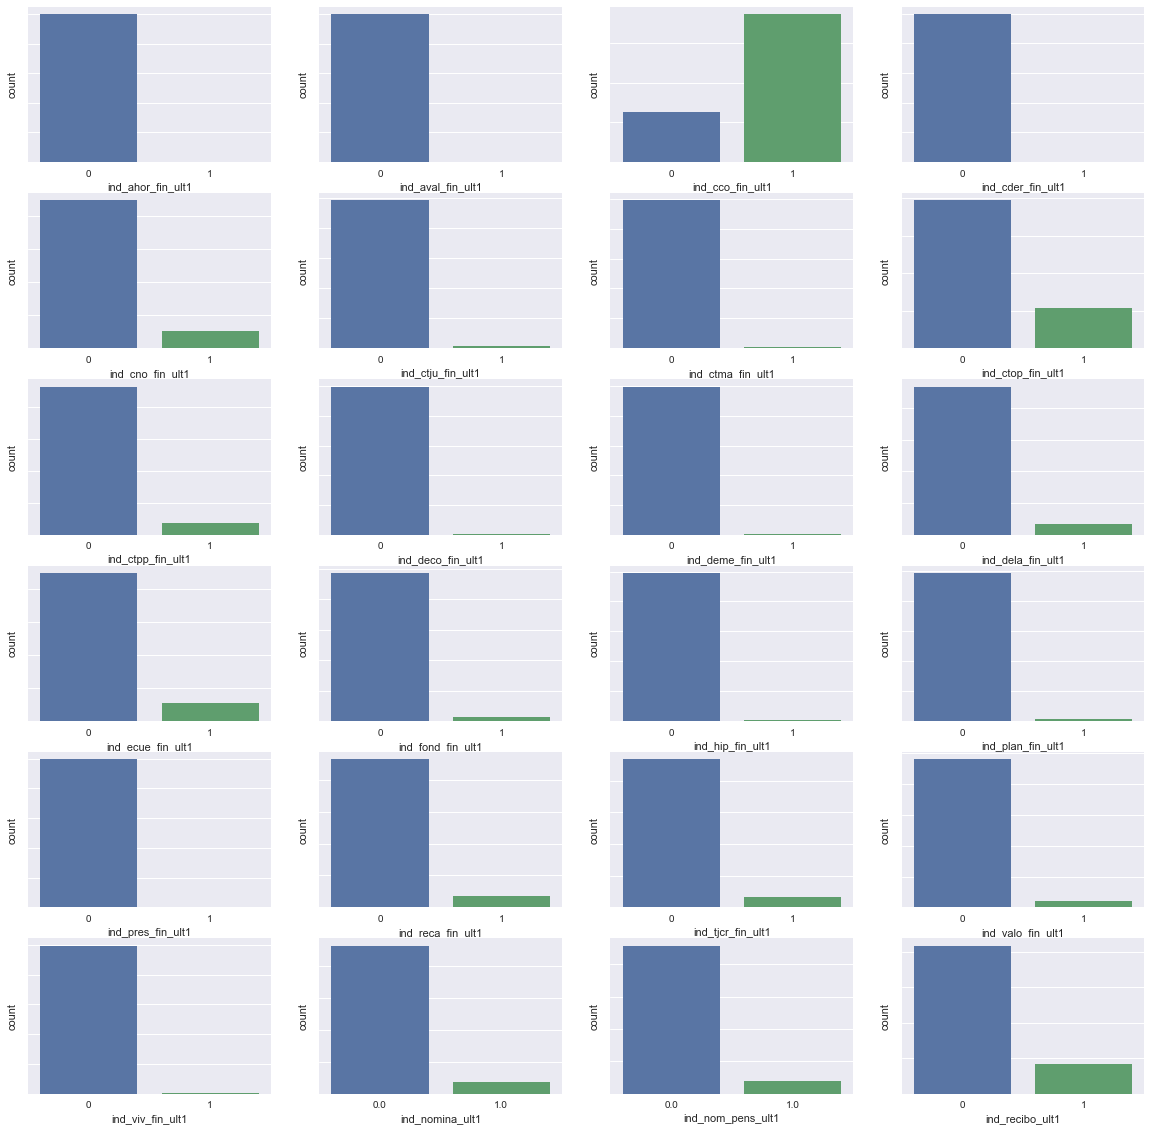

In [38]:
fig, ax = plt.subplots(6,4, figsize = (20,20))

for idx, n in enumerate(y_classes):
    
    sns.countplot(x=n, data=train, ax = ax[idx//4, idx%4])
    ax[idx//4, idx%4].set(yticklabels=[])
    
    continue  

In [46]:
train_count = train_y.sum()
train_count = train_count.drop(train_count[train_count == 0].index).sort_values(ascending=False)[:30]
count_data = pd.DataFrame({'count' :train_count})
count_data.head(24)

,count
ind_cco_fin_ult1,749626.0
ind_ctop_fin_ult1,212486.0
ind_recibo_ult1,166275.0
ind_ecue_fin_ult1,106267.0
ind_cno_fin_ult1,105296.0
ind_nom_pens_ult1,79113.0
ind_reca_fin_ult1,72581.0
ind_ctpp_fin_ult1,72079.0
ind_nomina_ult1,71242.0
ind_dela_fin_ult1,66881.0
